In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [4]:
def csv_to_lists(filename, lines_to_skip=1, y_columns = 1):
    xs = []
    ys = []
    for y in range(y_columns):
        ys.append([])
    with open(filename, "r") as infile:
        counter = 0
        for line in infile:
            counter += 1
            if(counter<=lines_to_skip):
                continue
            line = line.split(",")
            for idx in range(len(line)):
                if(idx > y_columns):
                    break
                if(idx == 0):
                    xs.append(float(line[idx].strip()))
                else:
                    ys[idx-1].append(float(line[idx].strip()))
    xs = np.array(xs)
    for y in range(y_columns):
        ys[y] = np.array(ys[y])
    return xs, ys

In [3]:
xs, ys = csv_to_lists("CHANNEL0_16TO12TO16.CSV", lines_to_skip=3)
xs_c, ys_c = csv_to_lists("CHANNEL0_CUSTOMFILTER_BIGGERPOWER.CSV", lines_to_skip=3)
xs_cl, ys_cl = csv_to_lists("CHANNEL0_CUSTOMFILTER.CSV", lines_to_skip=3)
xs_clwr, ys_clwr = csv_to_lists("CHANNEL0_CUSTOM_WORD_REVERSAL.CSV", lines_to_skip=3)
xs_ip, ys_ip = csv_to_lists("CHANNEL1_12BITIPFILTER_FIXED.CSV", lines_to_skip=3)

In [4]:
bs = np.array([0, -23, 0, 105, 0, -263, 0, 526, 0, -949, 0, 1672, 0, -3216, 0, 10342, 16384,
10342, 0, -3216, 0, 1672, 0, -949, 0, 526, 0, -263, 0, 105, 0, -23])/32768.0
w,h = signal.freqz(bs)
theory_frqs = w*3000/(2*np.pi)
theory_resps = 20*np.log10(abs(h))

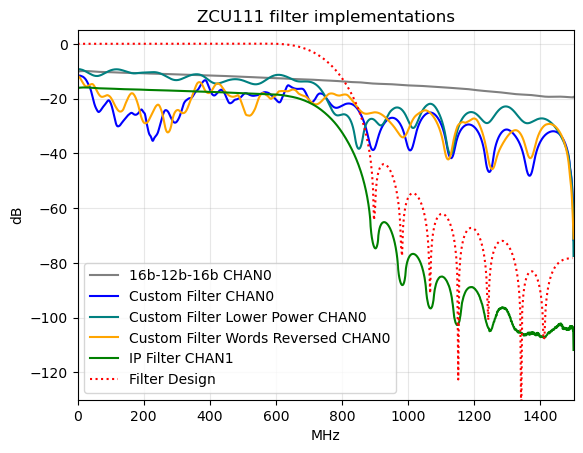

In [5]:
plt.title("ZCU111 filter implementations")
plt.plot(xs/(10**6), ys[0], label="16b-12b-16b CHAN0", color = "grey")
plt.plot(xs_c/(10**6), ys_c[0], label="Custom Filter CHAN0", color = "blue")
plt.plot(xs_cl/(10**6), ys_cl[0], label="Custom Filter Lower Power CHAN0", color = "teal")
plt.plot(xs_clwr/(10**6), ys_clwr[0], label="Custom Filter Words Reversed CHAN0", color = "orange")
plt.plot(xs_ip/(10**6), ys_ip[0], label="IP Filter CHAN1", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

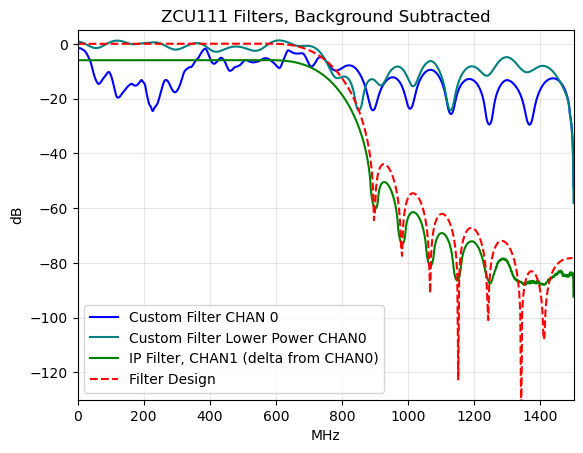

In [6]:
# plt.plot(xs, ys[0], label="16b-12b-16b")
plt.title("ZCU111 Filters, Background Subtracted")
plt.plot(xs_c/(10**6), np.subtract(ys_c[0],ys[0]), label="Custom Filter CHAN 0", color = "blue")
plt.plot(xs_cl/(10**6), np.subtract(ys_cl[0],ys[0]), label="Custom Filter Lower Power CHAN0", color = "teal")
plt.plot(xs_ip/(10**6), np.subtract(ys_ip[0],ys[0]), label="IP Filter, CHAN1 (delta from CHAN0)", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle="--", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# CHANNEL 1

In [7]:
xs0, ys0 = csv_to_lists("CHANNEL1_NULL_0DB.CSV", lines_to_skip=3)
xs_cl0, ys_cl0 = csv_to_lists("CHANNEL1_CUSTOMFILTER_0DB.CSV", lines_to_skip=3)
xs_ip0, ys_ip0 = csv_to_lists("CHANNEL1_IPFILTER_0DB.CSV", lines_to_skip=3)

xs8, ys8 = csv_to_lists("CHANNEL1_NULL_8DB.CSV", lines_to_skip=3)
xs_cl8, ys_cl8 = csv_to_lists("CHANNEL1_CUSTOMFILTER_8DB.CSV", lines_to_skip=3)
xs_ip8, ys_ip8 = csv_to_lists("CHANNEL1_IPFILTER_8DB.CSV", lines_to_skip=3)

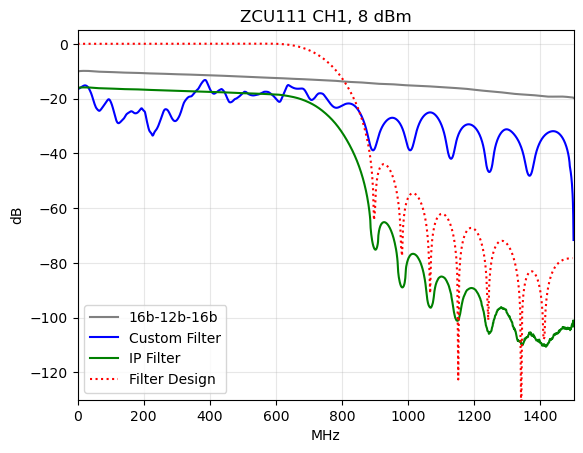

In [8]:
plt.title("ZCU111 CH1, 8 dBm")
plt.plot(xs8/(10**6), ys8[0], label="16b-12b-16b", color = "grey")
plt.plot(xs_cl8/(10**6), ys_cl8[0], label="Custom Filter", color = "blue")
plt.plot(xs_ip8/(10**6), ys_ip8[0], label="IP Filter", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

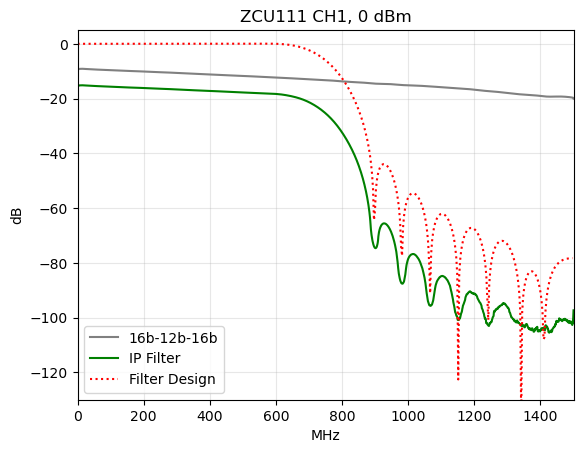

In [9]:
plt.title("ZCU111 CH1, 0 dBm")
plt.plot(xs0/(10**6), ys0[0], label="16b-12b-16b", color = "grey")
# plt.plot(xs_cl0/(10**6), ys_cl0[0], label="Custom Filter", color = "blue")
plt.plot(xs_ip0/(10**6), ys_ip0[0], label="IP Filter", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

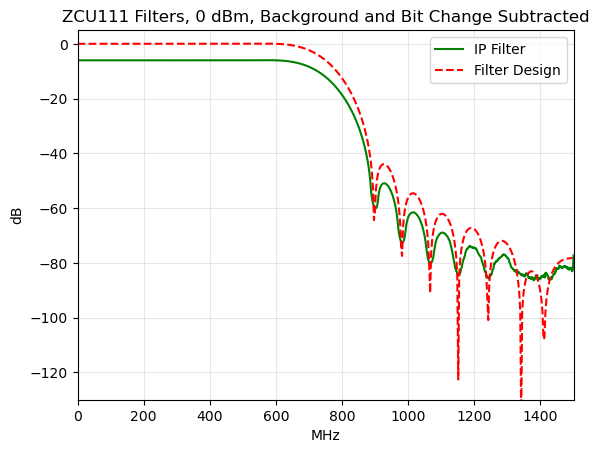

In [10]:
plt.title("ZCU111 Filters, 0 dBm, Background and Bit Change Subtracted")
# plt.plot(xs_cl0/(10**6), np.subtract(ys_cl0[0],ys0[0]), label="Custom Filter", color = "blue")
plt.plot(xs_ip0/(10**6), np.subtract(ys_ip0[0],ys0[0]), label="IP Filter", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle="--", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

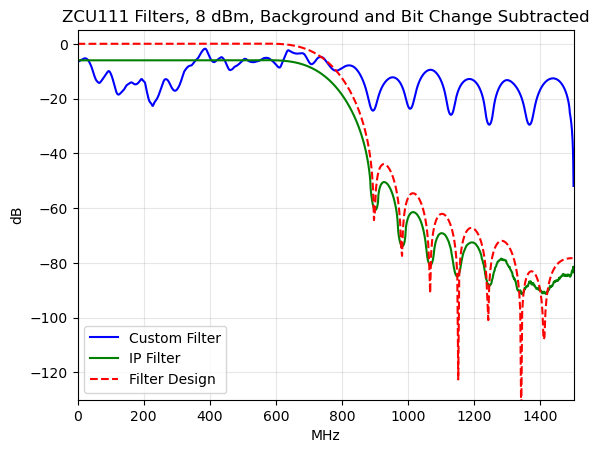

In [11]:
plt.title("ZCU111 Filters, 8 dBm, Background and Bit Change Subtracted")
plt.plot(xs_cl8/(10**6), np.subtract(ys_cl8[0],ys8[0]), label="Custom Filter", color = "blue")
plt.plot(xs_ip8/(10**6), np.subtract(ys_ip8[0],ys8[0]), label="IP Filter", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle="--", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

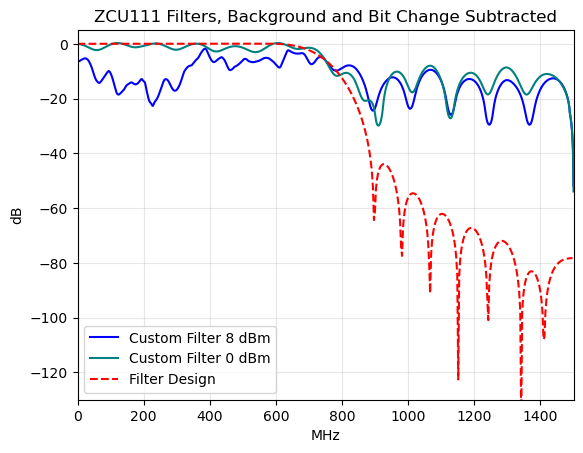

In [12]:
plt.title("ZCU111 Filters, Background and Bit Change Subtracted")
plt.plot(xs_cl8/(10**6), np.subtract(ys_cl8[0],ys8[0]), label="Custom Filter 8 dBm", color = "blue")
plt.plot(xs_cl0/(10**6), np.subtract(ys_cl0[0],ys0[0]), label="Custom Filter 0 dBm", color = "teal")
plt.plot(theory_frqs, theory_resps, linestyle="--", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [13]:
# bs = np.array([0, -23, 0, 105, 0, -263, 0, 526, 0, -949, 0, 1672, 0, -3216, 0, 10342, 16384,
# 10342, 0, -3216, 0, 1672, 0, -949, 0, 526, 0, -263, 0, 105, 0, -23])/32768.0
# w,h = signal.freqz(bs)
# plt.plot(w*3000/(2*np.pi), 20 * np.log10(abs(h)), linestyle=":", color="r")
# plt.show()

# Fixed Version

In [14]:
xs0f, ys0f = csv_to_lists("CHANNEL1_NULL_0DB.CSV", lines_to_skip=3)
xs_cl0f, ys_cl0f = csv_to_lists("CHANNEL0_CUSTOM_FIXED_4_10.CSV", lines_to_skip=3)
xs_ip0f, ys_ip0f = csv_to_lists("CHANNEL1_IP_FIXED_4_10.CSV", lines_to_skip=3)


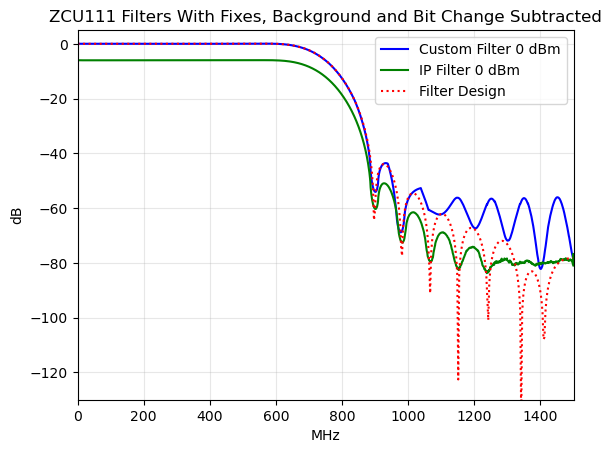

In [15]:
plt.title("ZCU111 Filters With Fixes, Background and Bit Change Subtracted")
plt.plot(xs_cl0/(10**6), np.subtract(ys_cl0f[0],ys0f[0]), label="Custom Filter 0 dBm", color = "blue")
plt.plot(xs_cl0/(10**6), np.subtract(ys_ip0f[0],ys0f[0]), label="IP Filter 0 dBm", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

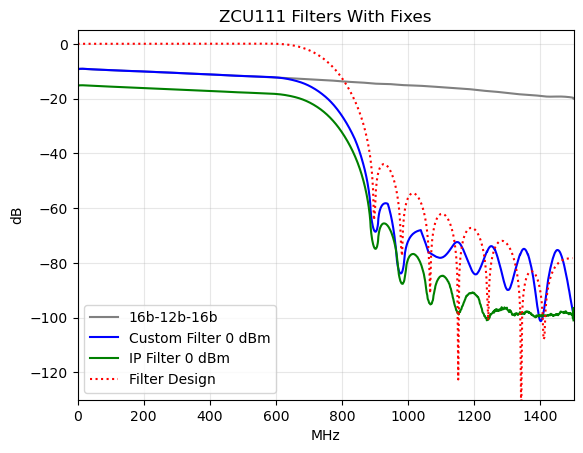

In [16]:
plt.title("ZCU111 Filters With Fixes")
plt.plot(xs0f/(10**6), ys0f[0], label="16b-12b-16b", color = "grey")
plt.plot(xs_cl0/(10**6), ys_cl0f[0], label="Custom Filter 0 dBm", color = "blue")
plt.plot(xs_cl0/(10**6), ys_ip0f[0], label="IP Filter 0 dBm", color = "green")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Fixed Version V2

In [17]:
xs0f, ys0f = csv_to_lists("CHANNEL1_NULL_0DB.CSV", lines_to_skip=3)
xs_cl0f, ys_cl0f = csv_to_lists("CHANNEL0_CUSTOM_FIXED_4_12_BITSHIFT.CSV", lines_to_skip=3)
xs_ip0f, ys_ip0f = csv_to_lists("CHANNEL1_IP_FIXED_4_12_BITSHIFT.CSV", lines_to_skip=3)


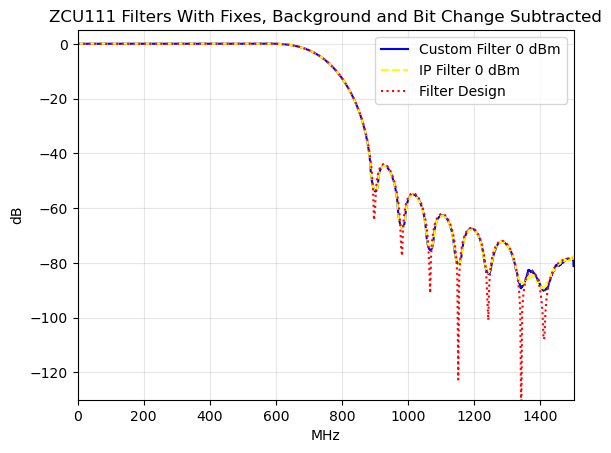

In [18]:
plt.title("ZCU111 Filters With Fixes, Background and Bit Change Subtracted")
plt.plot(xs_cl0/(10**6), np.subtract(ys_cl0f[0],ys0f[0]), label="Custom Filter 0 dBm", color = "blue")
plt.plot(xs_cl0/(10**6), np.subtract(ys_ip0f[0],ys0f[0]), linestyle="--", label="IP Filter 0 dBm", color = "yellow")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("LPF_comparison_April12.png")
plt.show()

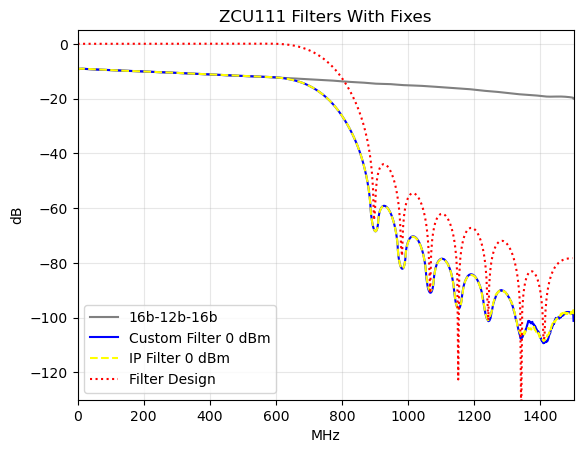

In [19]:
plt.title("ZCU111 Filters With Fixes")
plt.plot(xs0f/(10**6), ys0f[0], label="16b-12b-16b", color = "grey")
plt.plot(xs_cl0/(10**6), ys_cl0f[0], label="Custom Filter 0 dBm", color = "blue")
plt.plot(xs_cl0/(10**6), ys_ip0f[0], linestyle="--", label="IP Filter 0 dBm", color = "yellow")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1500)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("LPF_comparison_April12_raw.png")
plt.show()

# Loadable Biquad FIR Component

In [20]:
A=0.35
B = 1-2*A
print(B)
bs = np.array([A,B,A])#/32768.0
# bs = np.array([0,0.5,0])#/32768.0
w,h = signal.freqz(bs)
theory_frqs = w*3000/(2*np.pi)
theory_resps = 20*np.log10(abs(h))

0.30000000000000004


In [21]:
xsB0A0p5, ysB0A0p5 = csv_to_lists("loadable/B_0_A_0P5.CSV", lines_to_skip=3)
xsB0p5A0, ysB0p5A0 = csv_to_lists("loadable/B_0p5_A_0.CSV", lines_to_skip=3)
xsB0p25A0, ysB0p25A0 = csv_to_lists("loadable/B_0p25_A_0.CSV", lines_to_skip=3)

xsB1A0, ysB1A0 = csv_to_lists("loadable/B_1_A_0.CSV", lines_to_skip=3)

xsB0p3A0p35, ysB0p3A0p35 = csv_to_lists("loadable/B_0P3_A_0P35.CSV", lines_to_skip=3)




# xs_cl0f, ys_cl0f = csv_to_lists("CHANNEL0_CUSTOM_FIXED_4_12_BITSHIFT.CSV", lines_to_skip=3)
# xs_ip0f, ys_ip0f = csv_to_lists("CHANNEL1_IP_FIXED_4_12_BITSHIFT.CSV", lines_to_skip=3)

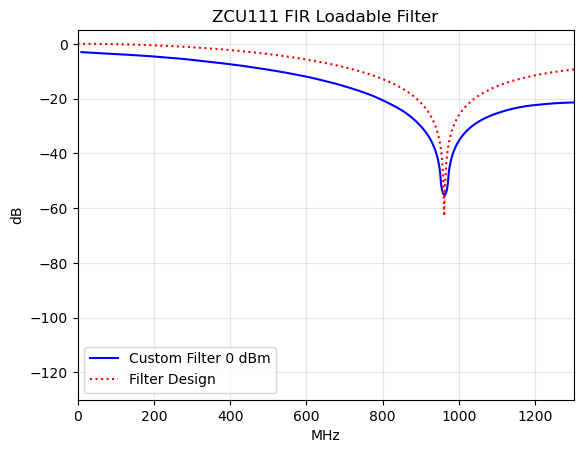

In [23]:
plt.title("ZCU111 FIR Loadable Filter")
plt.plot(xsB0p3A0p35/(10**6), ysB0p3A0p35[0], label="Custom Filter 0 dBm", color = "blue")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
plt.xlim(0,1300)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("LPF_comparison_April12_raw.png")
plt.show()

# IIR SIM

In [5]:
b, a = signal.iirnotch(350, 5, 3000)
pole = signal.tf2zpk(b,a)[1][0]
bs = np.array([A,B,A])#/32768.0
# bs = np.array([0,0.5,0])#/32768.0
w,h = signal.freqz(b,a)
theory_frqs = w*3000/(2*np.pi)
theory_resps = 20*np.log10(abs(h))

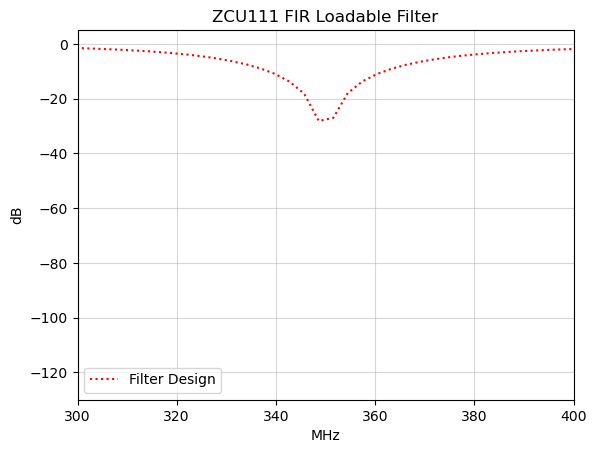

In [9]:
plt.title("ZCU111 FIR Loadable Filter")
# plt.plot(xsB0p3A0p35/(10**6), ysB0p3A0p35[0], label="Custom Filter 0 dBm", color = "blue")
plt.plot(theory_frqs, theory_resps, linestyle=":", color="r", label = "Filter Design")
plt.xlabel("MHz")
plt.ylabel("dB")
# plt.xlim(0,1300)
plt.xlim(300,400)
plt.ylim(-130,5)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("LPF_comparison_April12_raw.png")
plt.show()